# Covid-19 Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Covid Data.csv')

In [3]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


#sex: 1 for female and 2 for male.
#age: of the patient.
#classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
#degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
#patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
#pneumonia: whether the patient already have air sacs inflammation or not.
#pregnancy: whether the patient is pregnant or not.
#diabetes: whether the patient has diabetes or not.
#copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
#asthma: whether the patient has asthma or not.
#inmsupr: whether the patient is immunosuppressed or not.
#hypertension: whether the patient has hypertension or not.
#cardiovascular: whether the patient has heart or blood vessels related disease.
#renal chronic: whether the patient has chronic renal disease or not.
#other disease: whether the patient has other disease or not.
#obesity: whether the patient is obese or not.
#tobacco: whether the patient is a tobacco user.
#usmr: Indicates whether the patient treated medical units of the first, second or third level.
#medical unit: type of institution of the National Health System that provided the care.
#intubed: whether the patient was connected to the ventilator.
#icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
#date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

## 1.What is the average age of the patients?

In [4]:
df['AGE'].mean()

41.794102472403026

## 2. What is the maximum and minimum age in the dataset?

In [5]:
df['AGE'].max()

121

In [6]:
df['AGE'].min()

0

## 3.How many unique patients are there in the dataset?

In [7]:
len(df.axes[0])

1048575

## 4.What is the distribution of patient types (returned home vs. hospitalized)?

<Axes: xlabel='PATIENT_TYPE', ylabel='count'>

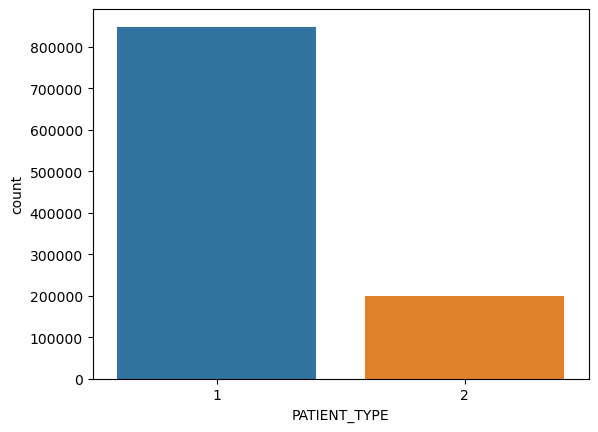

In [8]:
sns.countplot(x='PATIENT_TYPE',data=df)

## 5.What are the top three pre-existing conditions among the patients?


In [9]:
pd.DataFrame(df[['PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']]).sum().sort_values().head(3)


OBESITY         2228406
HIPERTENSION    2232405
DIABETES        2292609
dtype: int64

## 6. How many patients have missing values for the "usmr" column?


In [10]:
df['USMER'].isna().sum()

0

## 7. Can we visualize the correlation between different pre-existing conditions using a heatmap?


In [11]:
c=df[['PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']]

In [12]:
c.corr()

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
PNEUMONIA,1.000000,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325
PREGNANT,-0.007284,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794
DIABETES,-0.004484,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763
COPD,-0.005618,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097
ASTHMA,-0.005392,0.016765,0.829349,0.908929,1.000000,0.868917,0.864264,0.696709,0.891026,0.824631,0.895050,0.845067
INMSUPR,-0.000802,0.014265,0.781108,0.852273,0.868917,1.000000,0.825158,0.734826,0.853365,0.783953,0.852755,0.806749
HIPERTENSION,-0.004799,0.015335,0.835018,0.855249,0.864264,0.825158,1.000000,0.671532,0.861063,0.805127,0.860477,0.816539
OTHER_DISEASE,0.001612,0.014175,0.634611,0.687323,0.696709,0.734826,0.671532,1.000000,0.717129,0.649809,0.704725,0.668621
CARDIOVASCULAR,-0.004758,0.014378,0.809417,0.880097,0.891026,0.853365,0.861063,0.717129,1.000000,0.834389,0.913248,0.858102
OBESITY,-0.004276,0.015895,0.752739,0.814868,0.824631,0.783953,0.805127,0.649809,0.834389,1.000000,0.842466,0.801834


<Axes: >

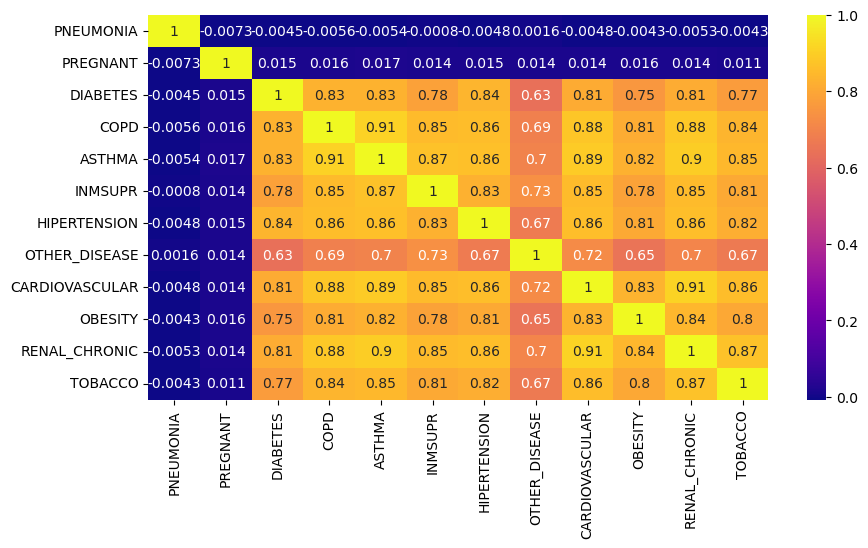

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(c.corr(),cmap='plasma',annot=(True))

## 8. How does age correlate with the different COVID test findings?


In [14]:
df[['CLASIFFICATION_FINAL','AGE']].corr()

,CLASIFFICATION_FINAL,AGE
CLASIFFICATION_FINAL,1.000000,-0.152637
AGE,-0.152637,1.000000


## 9. What is the distribution of ages among different outcomes (recovered, died)?


In [15]:
recovered=pd.DataFrame(df[df['DATE_DIED']== '9999-99-99'])
died=pd.DataFrame(df[df['DATE_DIED']!= '9999-99-99'])

In [16]:
recovered["AGE"]

5          40
6          64
7          64
8          37
9          25
           ..
1048570    40
1048571    51
1048572    55
1048573    28
1048574    52
Name: AGE, Length: 971633, dtype: int64

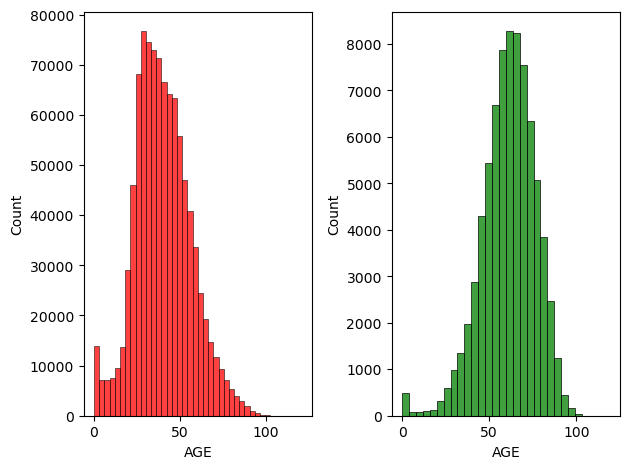

In [17]:

fig,axes=plt.subplots(nrows=1,ncols=2)

sns.histplot(recovered['AGE'],bins=40,ax = axes[0],color='red')

sns.histplot(died['AGE'],bins=30, ax = axes[1],color='green')
plt.tight_layout()

## 10. Can we create a bar chart to show the count of patients in each medical unit?


<Axes: xlabel='MEDICAL_UNIT', ylabel='count'>

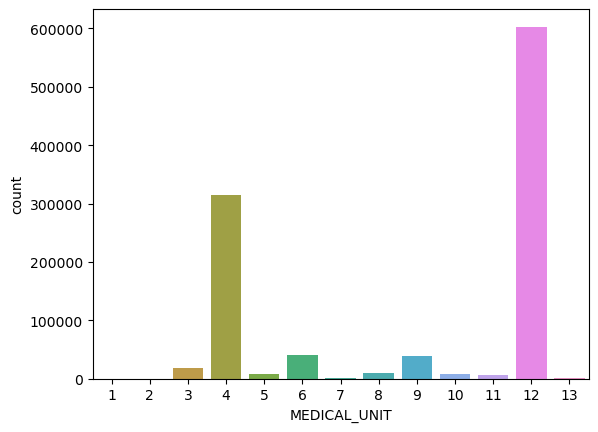

In [18]:
sns.countplot(x='MEDICAL_UNIT',data=df)

## 11. How does the distribution of ages vary between male and female patients?


In [19]:
def gender(x):
    if x==1:
        return 'Female'
    else:
        return 'Male'

<Axes: xlabel='GENDER', ylabel='AGE'>

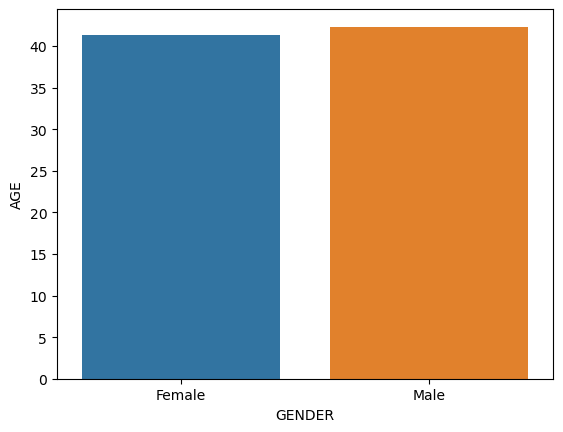

In [20]:
df["GENDER"]=df['SEX'].apply(gender)
sns.barplot(x='GENDER',y='AGE',data=df)

## 12. Can we visualize the percentage of smokers among the patients?


In [21]:
df['TOBACCO'].value_counts(normalize=True)

TOBACCO
2     0.916462
1     0.080467
98    0.003071
Name: proportion, dtype: float64

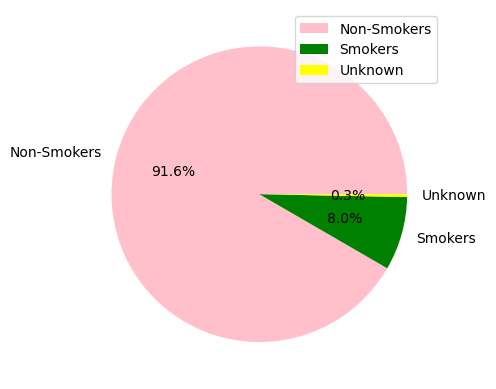

In [22]:
plt.pie(df['TOBACCO'].value_counts(normalize=True),colors=('pink','green','yellow'),labels=["Non-Smokers","Smokers","Unknown"],autopct='%1.1f%%')
plt.legend()

## 13. What is the average age of patients with and without diabetes?


In [23]:
df['DIABETES'].unique()

array([ 2,  1, 98], dtype=int64)

In [24]:
Diabetes=df[df['DIABETES']==1]
Non_Diabetes=df[df['DIABETES']==2]

In [25]:
Diabetes['AGE'].mean()

56.96422085143492

In [26]:
Non_Diabetes['AGE'].mean()

39.707406047065575

## 14. How does the distribution of ages differ between ICU-admitted and non-ICU-admitted patients?


In [27]:
df['ICU'].value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [28]:
ICU=df[df['ICU']==1]
NON_ICU=df[df['ICU']==2]

<Axes: xlabel='AGE', ylabel='Count'>

<Figure size 1280x960 with 0 Axes>

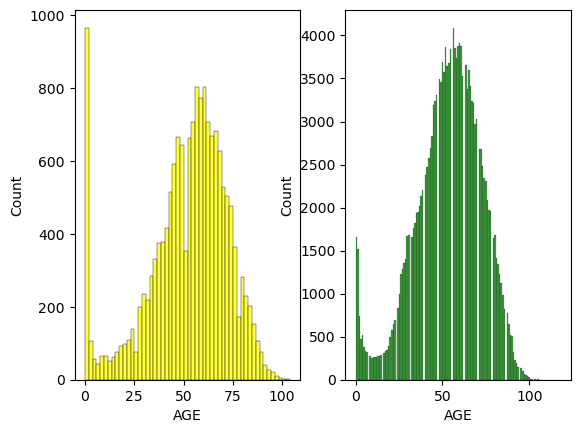

In [29]:
plt.figure(dpi=200)
fig,axes=plt.subplots(nrows=1,ncols=2)
sns.histplot(ICU['AGE'],color='yellow',ax=axes[0])
sns.histplot(NON_ICU['AGE'],color='green',ax=axes[1])

## 15. Can we visualize the trend of COVID cases over time (if time information is available)?


In [30]:
df['TIME']=pd.to_datetime(df['DATE_DIED'],errors='coerce')

In [31]:
Time=df.groupby('TIME').size().reset_index(name='Cases')

In [32]:
Time.head()

,TIME,Cases
0,2020-01-02,13
1,2020-01-03,11
2,2020-01-04,56
3,2020-01-05,555
4,2020-01-06,829


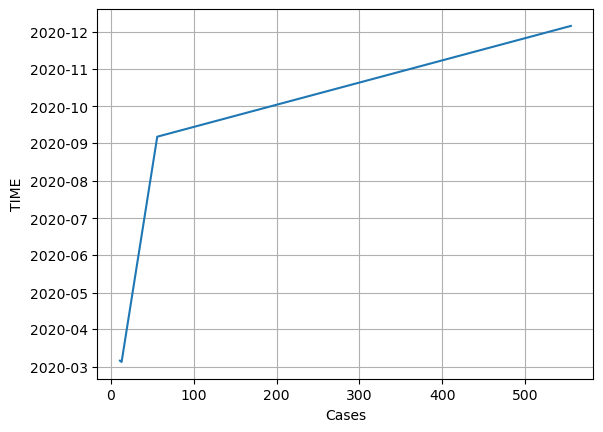

In [33]:
sns.lineplot(x=Time['Cases'],y=df['TIME'],markers='o')
plt.grid()

## 16.Is there a difference in age distribution between pregnant and non-pregnant patients?


In [34]:
df['PREGNANT'].unique()

array([ 2, 97, 98,  1], dtype=int64)

In [35]:
Pre=df[df['PREGNANT']==1]
Non_Pre=df[df['PREGNANT']==2]

<Axes: xlabel='AGE', ylabel='Count'>

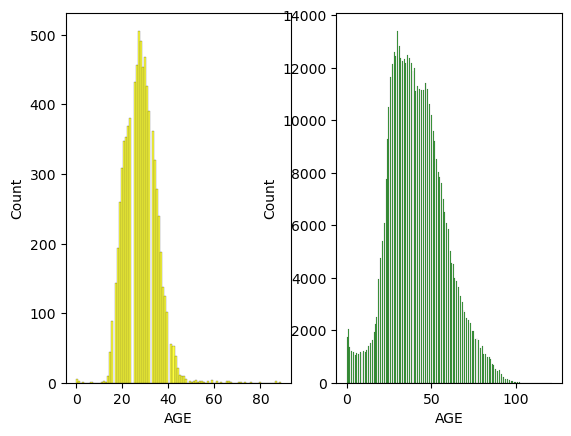

In [36]:
fig,axes=plt.subplots(nrows=1,ncols=2)
sns.histplot(Pre['AGE'],color='yellow',ax=axes[0])
sns.histplot(Non_Pre['AGE'],color='green',ax=axes[1])

## 17. How does the distribution of ages vary between different outcomes (recovered, died) for diabetic patients?

In [37]:
g=df[(df['DATE_DIED']== '9999-99-99') & (df['DIABETES']==1)]
h=df[(df['DATE_DIED']!= '9999-99-99') & (df['DIABETES']==1)]

<Axes: xlabel='AGE', ylabel='Count'>

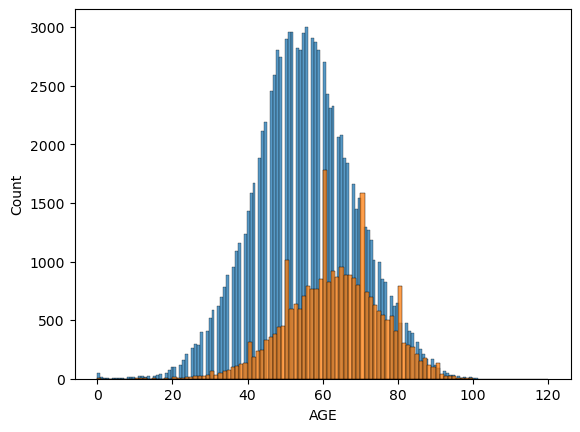

In [39]:

sns.histplot(g['AGE'])
sns.histplot(h['AGE'])
